**T-Test (Student's T-Test)**
> T test analyzes whether there is a significant difference between the means of two groups.
>
> **1. One Sample T-Test**
> > A one-sample t-test is a location test of whether the mean of a population has a value specified in a null hypothesis. In testing the null hypothesis that the population mean is equal to a specified (reference) value.
> > |  |  |
> > |--|--|
> > | $H_0$ | $\mu = X$ |
> > | $H_1$ | $\mu ≠ X$ |
>
> **2. Independent Samples T-Test [Two Sample T-Test]**
> > A two-sample location test of the null hypothesis such that the means of two populations are equal.
> > |  |  |
> > |--|--|
> > | $H_0$ | $\mu_A = \mu_B$ |
> > | $H_1$ | $\mu_A ≠ \mu_B$ |
> >
> > **Welch's T-Test [Unequal Variances T-Test]**
> > > Welch's t-test is a two-sample location test which is used to test that two populations have equal means. It is an adaptation of Student's t-test, and is more reliable when the two samples have unequal variances. 
>
> **3. Paired Sample T-Test [Two Sample T-Test]**
> > Paired samples t-tests typically consist of a sample of matched pairs of similar units, or one group of units that has been tested twice (a "repeated measures" t-test). Paired samples t-tests are often referred to as "dependent samples t-tests".
> > 
> > Paired samples t-test compares the means of two variables for a single group. The procedure computes the differences between values of the two variables for each case and tests whether the average differs from 0. 
> > |  |  |
> > |--|--|
> > | $H_0$ | $\mu_1 = \mu_2$ |
> > | $H_1$ | $\mu_1 ≠ \mu_2$ |
>
> **ASSUMPTIONS**
> > → Sample  must be independent <br>
> > → Variable must be metric <br>
> > → Variable must be normally distributed <br>
> > **for independent samples t-test** <br>
> > → Variances in two groups must be approximately equal.

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

**Central Limit Theorem (CLT)**
> An appropriately selected sample will resemble the whole population.
>
> **Regardless of the distribution** of the population, if **several random samples** are taken from population, the mean of these samples will converge to a normal distribution around the population mean.
>
> If the sample size is above 30 (general assumption), the process distribution will converge to the normal distribution. In this way, distributions with different distributional characteristics can be converged to the normal distribution, allowing process modeling to be performed according to normal distribution criteria.

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

np.random.seed(0)

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Functions to Use </p>

In [2]:
α = alpha = 0.05

def decision(p, alpha=0.05):
    'acceptance or rejection of the null hypothesis'
    if p < alpha: return 'H0 rejected.'
    else: return 'H0 cannot be rejected.'

In [3]:
def clt_helper(p, s, a, i=1000):
    ''' p: population
        s: sample size
        a: axis
        i: iteration '''
    if s==0:
        a.hist(p, edgecolor='white', color='skyblue')
        a.set_title(f'population', fontweight='bold')
    else:    
        sample_mean = [np.mean(np.random.choice(p, size=s, replace=False)) for _ in range(i)]
        
        a.hist(sample_mean, edgecolor='white', color='skyblue')
        a.set_title(f'n={s}', fontweight='bold')

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; CENTRAL LIMIT TEOREM </p>

In [4]:
data = np.random.uniform(low=18, high=75, size=40000)
print('Mean:', data.mean())

Mean: 46.3664518917058


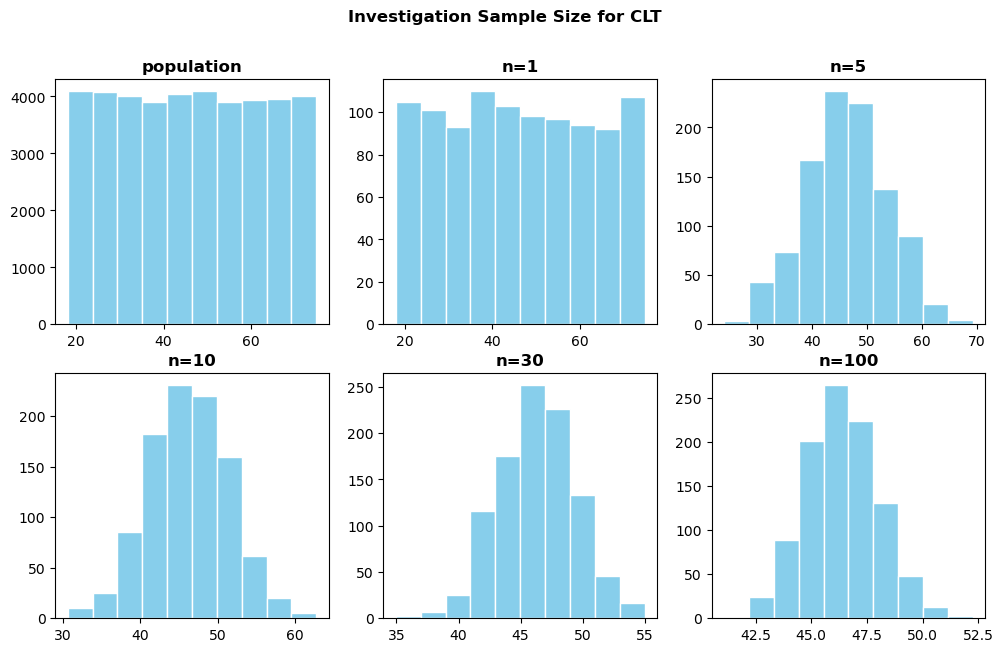

In [5]:
fig, axs = plt.subplots(2,3, figsize=(12,7))
fig.suptitle('Investigation Sample Size for CLT', fontweight='bold')

sample_sizes = [[0, 1, 5 ], [10, 30, 100]]

for i, row in enumerate(axs):
    for j, col in enumerate(row):
        clt_helper(data, sample_sizes[i][j], a=axs[i, j])
        
plt.show()

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; ONE SAMPLE T-TEST </p>

In [6]:
rv = 280   # reference value  - 300
x̄ = 311.2  # sample mean
s = 64.4   # sample standard deviation

data = np.random.normal(x̄, s , size=20)
t, p = stats.ttest_1samp(data, popmean=rv, alternative='two-sided')

print(f'T: {t:.4f}')
print(f'P: {p:.4f}')
print('Decision:', decision(p, α))

T: 3.2963
P: 0.0038
Decision: H0 rejected.


<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp;  INDEPENDENT SAMPLES T-TEST </p>

In [7]:
data = pd.read_excel('data/02_school.xlsx')
# display(data)

t, p = stats.ttest_ind(data['School A'], data['School B'], alternative='two-sided')

print(f'T: {t:.4f}')
print(f'P: {p:.4f}')
print('Decision:', decision(p, α))

T: 2.1892
P: 0.0437
Decision: H0 rejected.


<p style="background-image: linear-gradient(#f87674, #ffffff 10%); font-weight:bold;"> 
    &nbsp; WELCH'S T-TEST </p>

In [8]:
data = pd.read_excel('data/03_attitudes.xlsx')
# display(data)
old = data[data['Group']=='Old']
new = data[data['Group']=='New']

t, p = stats.ttest_ind(old['Attitude'], new['Attitude'], alternative='two-sided', equal_var=False)

print(f'T: {t:.4f}')
print(f'P: {p:.4f}')
print('Decision:', decision(p, α))

T: -3.7775
P: 0.0027
Decision: H0 rejected.


<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; PAIRED SAMPLE T-TEST </p>

In [9]:
data = pd.read_excel('data/04_participants.xlsx')
# display(data)

t, p = stats.ttest_rel(data['Old'], data['New'], alternative='two-sided')

# diff = data['Old'] - data['New']
# t, p = stats.ttest_1samp(diff, popmean=0, alternative='two-sided')

print(f'T: {t:.4f}')
print(f'P: {p:.4f}')
print('Decision:', decision(p, α))

T: -3.6819
P: 0.0051
Decision: H0 rejected.


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>